In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import random

from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten, Reshape
from keras.optimizers import Adam
from keras import regularizers
from keras import optimizers
from keras import initializers
from keras.preprocessing import image

import keras.backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.patches as patches

C:\Users\vdel\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [123]:
dataRaw = pd.read_csv('totHTdataFile.txt')


In [124]:
print(len(dataRaw[dataRaw.valid == 0]))
print(len(dataRaw))
print(len(np.unique(dataRaw.id)))


77160
158449
13215


In [181]:
#Shape the data
maxBlobs = 20

ids = np.unique(dataRaw.id)

nPts = len(ids)
xinput = np.zeros((nPts, maxBlobs))
yinput = np.zeros((nPts, maxBlobs))
targetValue = np.zeros((nPts, maxBlobs))
#print(dataRaw[dataRaw.id == ids[0]]['x'])

for iid in range(nPts) :
    tmpNbPts = len(dataRaw[dataRaw.id == ids[iid]])
    if(tmpNbPts<maxBlobs):
        xinput[iid,:tmpNbPts] = dataRaw[dataRaw.id == ids[iid]]['x'].values
        yinput[iid,:tmpNbPts] = dataRaw[dataRaw.id == ids[iid]]['y'].values
        targetValue[iid,:tmpNbPts] = dataRaw[dataRaw.id == ids[iid]]['valid'].values
#    for data in dataRaw[dataRaw.id == ids[iid]]:
#        xinput

xinput = np.reshape(xinput, (xinput.shape[0], xinput.shape[1], 1))
yinput = np.reshape(yinput, (yinput.shape[0], yinput.shape[1], 1))
xtot = np.concatenate((xinput, yinput), axis=2)

print(xtot.shape)
print(targetValue.shape)

(13215, 20, 2)
(13215, 20)


12754


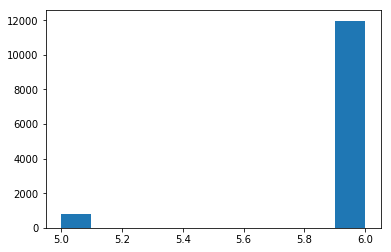

In [189]:
# Check how much points are kept
nbPts = np.sum(targetValue>0.5, axis=1)

print(len(nbPts))

plt.hist(nbPts)
plt.show()

In [188]:
goodPoints = np.where((nbPts<7) & (nbPts > 1))
xtot = xtot[goodPoints]
targetValue = targetValue[goodPoints]
print(len(xtot), len(targetValue))

12754 12754


In [190]:
# Shuffle data
xtrain, ytrain = shuffle(xtot, targetValue, random_state=0)
xvalid = xtrain[10000:]
#xtest = xtrain[2500:]
xtrain = xtrain[:10000]
yvalid = ytrain[10000:]
#ytest = ytrain[2500:]
ytrain = ytrain[:10000]

In [191]:
def model(Xshape):
    
    mod = Sequential()
    
    mod.add(Reshape((Xshape[0]*Xshape[1],), input_shape=(Xshape)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.)))

    mod.add(Dense(Xshape[0], activation='sigmoid', kernel_initializer='glorot_normal'))
    
    return mod

In [192]:
mymodel = model(xtot.shape[1:])
opt = optimizers.Adam(lr=0.0001)
mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [193]:
# First train with small mini batch size and default learning rate
mymodel.fit(xtrain, ytrain, epochs = 100, batch_size=64)

Epoch 1/100
10000/10000 [==============================] - 1s 149us/step - loss: 0.2886 - acc: 0.8628
Epoch 2/100
10000/10000 [==============================] - 0s 28us/step - loss: 0.0813 - acc: 0.9734
Epoch 3/100
10000/10000 [==============================] - 0s 23us/step - loss: 0.0603 - acc: 0.9820
Epoch 4/100
10000/10000 [==============================] - 0s 23us/step - loss: 0.0508 - acc: 0.9851
Epoch 5/100
10000/10000 [==============================] - 0s 26us/step - loss: 0.0451 - acc: 0.9870
Epoch 6/100
10000/10000 [==============================] - 0s 27us/step - loss: 0.0426 - acc: 0.9874
Epoch 7/100
10000/10000 [==============================] - 0s 25us/step - loss: 0.0389 - acc: 0.9889
Epoch 8/100
10000/10000 [==============================] - 0s 25us/step - loss: 0.0376 - acc: 0.9891
Epoch 9/100
10000/10000 [==============================] - 0s 25us/step - loss: 0.0349 - acc: 0.9901
Epoch 10/100
10000/10000 [==============================] - 0s 24us/step - loss: 0.0326 - 

10000/10000 [==============================] - 0s 23us/step - loss: 0.0152 - acc: 0.9957
Epoch 82/100
10000/10000 [==============================] - 0s 23us/step - loss: 0.0157 - acc: 0.9957
Epoch 83/100
10000/10000 [==============================] - 0s 23us/step - loss: 0.0174 - acc: 0.9953
Epoch 84/100
10000/10000 [==============================] - 0s 23us/step - loss: 0.0290 - acc: 0.9918
Epoch 85/100
10000/10000 [==============================] - 0s 24us/step - loss: 0.0157 - acc: 0.9958
Epoch 86/100
10000/10000 [==============================] - 0s 24us/step - loss: 0.0154 - acc: 0.9958
Epoch 87/100
10000/10000 [==============================] - 0s 23us/step - loss: 0.0148 - acc: 0.9959
Epoch 88/100
10000/10000 [==============================] - 0s 24us/step - loss: 0.0145 - acc: 0.9961
Epoch 89/100
10000/10000 [==============================] - 0s 24us/step - loss: 0.0159 - acc: 0.9957
Epoch 90/100
10000/10000 [==============================] - 0s 23us/step - loss: 0.0157 - acc: 

In [194]:
# Evaluate the model on the valid dataset
print(mymodel.metrics_names)
print(mymodel.evaluate(xvalid, yvalid))

['loss', 'acc']
2754/2754 [==============================] - 0s 130us/step
[0.022923295400338755, 0.9943355069960385]


2754


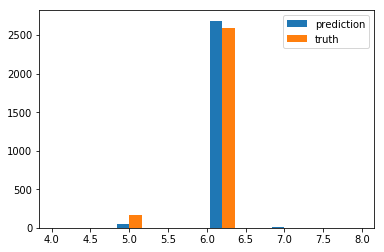

In [198]:
# Check how much points are kept
ypredict = mymodel.predict(xvalid)
print(len(ypredict))
nbPtsPred = np.sum(ypredict>0.5, axis=1)
nbPtsTruth = np.sum(yvalid>0.5, axis=1)

plt.hist([nbPtsPred,nbPtsTruth], label=['prediction','truth'])
plt.legend(loc='upper right')
plt.show()

array([6, 0, 0, ..., 0, 0, 6])